# sklearn_交叉验证 2 Cross-validation

https://morvanzhou.github.io/tutorials/machine-learning/sklearn/3-3-cross-validation2/

learning curve 可以很直观的看出我们的 model 学习的进度, 对比发现有没有 overfitting 的问题. 然后我们可以对我们的 model 进行调整, 克服 overfitting 的问题.

In [16]:
from sklearn.model_selection import learning_curve #学习曲线模块
from sklearn.datasets import load_digits # digits数据集
from sklearn.svm import SVC # Support Vector Classifier
import matplotlib.pyplot as plt # 可视化模块
import numpy as np
%matplotlib inline

In [7]:
digits = load_digits()
X = digits.data; print(X.shape)
y = digits.target; print(y)

(1797, 64)
[0 1 2 ..., 8 9 8]


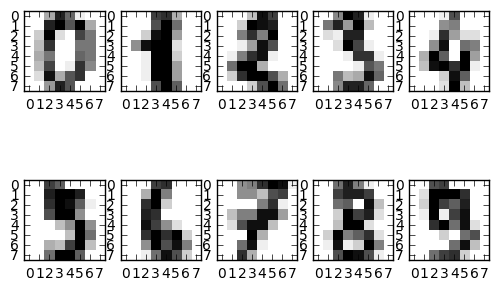

In [38]:
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i].reshape((8, 8)), cmap=plt.cm.gray_r, interpolation='nearest')

## Training

In [52]:
train_sizes, train_scores, test_scores = learning_curve(
    SVC(gamma=0.001), X, y, cv=10, scoring='f1_micro',
    train_sizes=[0.1, 0.25, 0.5, 0.75, 1])

# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score

#平均每一轮所得到的平均方差(共5轮，样本數分别为：10%、25%、50%、75%、100%)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

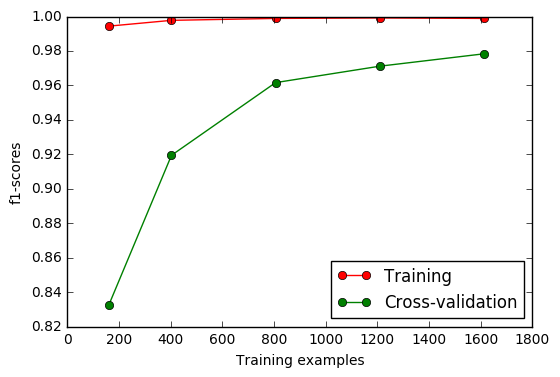

In [54]:
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
        label="Cross-validation")

plt.xlabel("Training examples")
plt.ylabel("f1-scores")
plt.legend(loc="best")
plt.show()